In [1]:
import quake_envs
from quake_envs.simulations.utils import *
from quake_envs.simulations.interdep_network import InterdependentNetworkSimulation
import geopandas as gpd
import pandas as pd
from quake_envs.simulations.earthquake_funcs import AttenuationModels
from pyincore import IncoreClient
from geopy.distance import geodesic


In [6]:
import gymnasium as gym
import numpy as np
shared_observation_space = gym.spaces.Box(0, 500, shape=(1,), dtype=np.float32)
obs = np.array([1,1,1,1])
def _get_state():
  n_states = int(shared_observation_space.high[0])
  one_hot = np.zeros((n_states, 4), dtype=int)
  one_hot[obs, np.arange(4)] = 1
  return one_hot


print(_get_state())

[[0 0 0 0]
 [1 1 1 1]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [2]:
def get_bearer_token():
  return "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfa1pWbFM4OU1SVWNZaURYUjByaGVVSUh6RzdZWXZ4eXcxZ1l3WjJZajVjIn0.eyJleHAiOjE3NDY0NjQyMTQsImlhdCI6MTc0NjQ0OTgxNCwiYXV0aF90aW1lIjoxNzQ2NDQ5ODEyLCJqdGkiOiIwYmFhOGNkNC1jYWE5LTQ0YTQtODRhYy0yYjkyODNmMDVkMWUiLCJpc3MiOiJodHRwczovL3Rvb2xzLmluLWNvcmUub3JnL2F1dGgvcmVhbG1zL0luLWNvcmUiLCJhdWQiOlsiSU5DT1JFIiwiYWNjb3VudCJdLCJzdWIiOiIyNWYwN2ZmMy1kMGU4LTQxZGQtOWMxOC0xODZmNjg0M2ZhYzUiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWFjdC1hdXRoIiwibm9uY2UiOiJkMWY2NjE0Ny1mMjViLTQxNTEtODAzMS1hOGM2YjI3NGU1YjkiLCJzZXNzaW9uX3N0YXRlIjoiYjY0ZDBiM2MtZDBiZS00NDI4LWI0ZDctMDNmZTA3YzlhZmJlIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vdG9vbHMuaW4tY29yZS5vcmciLCJodHRwczovL2luY29yZS5uY3NhLmlsbGlub2lzLmVkdSIsImh0dHA6Ly9sb2NhbGhvc3Q6MzAwMCJdLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsiZGVmYXVsdC1yb2xlcy1pbi1jb3JlIiwib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiIsImluY29yZV91c2VyX3JvbGUiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50Iiwidmlldy1wcm9maWxlIl19fSwic2NvcGUiOiJvcGVuaWQgcHJvZmlsZSBlbWFpbCIsInNpZCI6ImI2NGQwYjNjLWQwYmUtNDQyOC1iNGQ3LTAzZmUwN2M5YWZiZSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYW1lIjoiQW50b25pb3MgTWF2cm90YXMiLCJncm91cHMiOlsiaW5jb3JlX3VzZXIiXSwicHJlZmVycmVkX3VzZXJuYW1lIjoidG9ueV9tYXYiLCJnaXZlbl9uYW1lIjoiQW50b25pb3MiLCJmYW1pbHlfbmFtZSI6Ik1hdnJvdGFzIiwiZW1haWwiOiJhbnRvbmlvc21hdnJvdGFzQGdtYWlsLmNvbSJ9.EbQR7mWZv5jVeBtg_S88N7wN71ygt-B_gJrlv2Lk1dP4zmWb6Lm-j642gmZ-AcAIkv-8I5KKmdXNtGjdv3cpH1iT5gXzCKqIte9ERMVy-nc3q7PR75dBRf6mLuu8ubCvLFEi89NphmyetqAvACgoGJf3xijwrHrsPz-kWdURZnwKCaSk3zG5_XfT6Dq7Gbuv23ta-Rz87HCfureQzPATeqlCut8qX50X0gr3v_6xcCvfxXdM-WHIS-pA6TGZv6GkKSJTWAJ1rhHZSJUTgkfMnAqX_ZIow2A4IHGHsk_Guc5J9j8papLjc8D9j3ElflJMRdD2dTo7aOQZTEIYsMa01A"

bearer_token = get_bearer_token()

In [3]:
client = IncoreClient()

Connection successful to IN-CORE services. pyIncore version detected: 1.21.0


Set 2 study buildings with bounds: (-118.24302483704504, 34.053265561193264, -118.24141185843887, 34.05370943501951)
Set local road network with 2 links.
Loading network Anaheim, USA...
Network Anaheim, USA loaded
Reading the network data took 0.0 secs

Successfully loaded net df and demand df. Successfully converted them to <quake_envs.simulations.traffic_assignment.FlowTransportNetwork object at 0x000002D9EE9FF8E0>


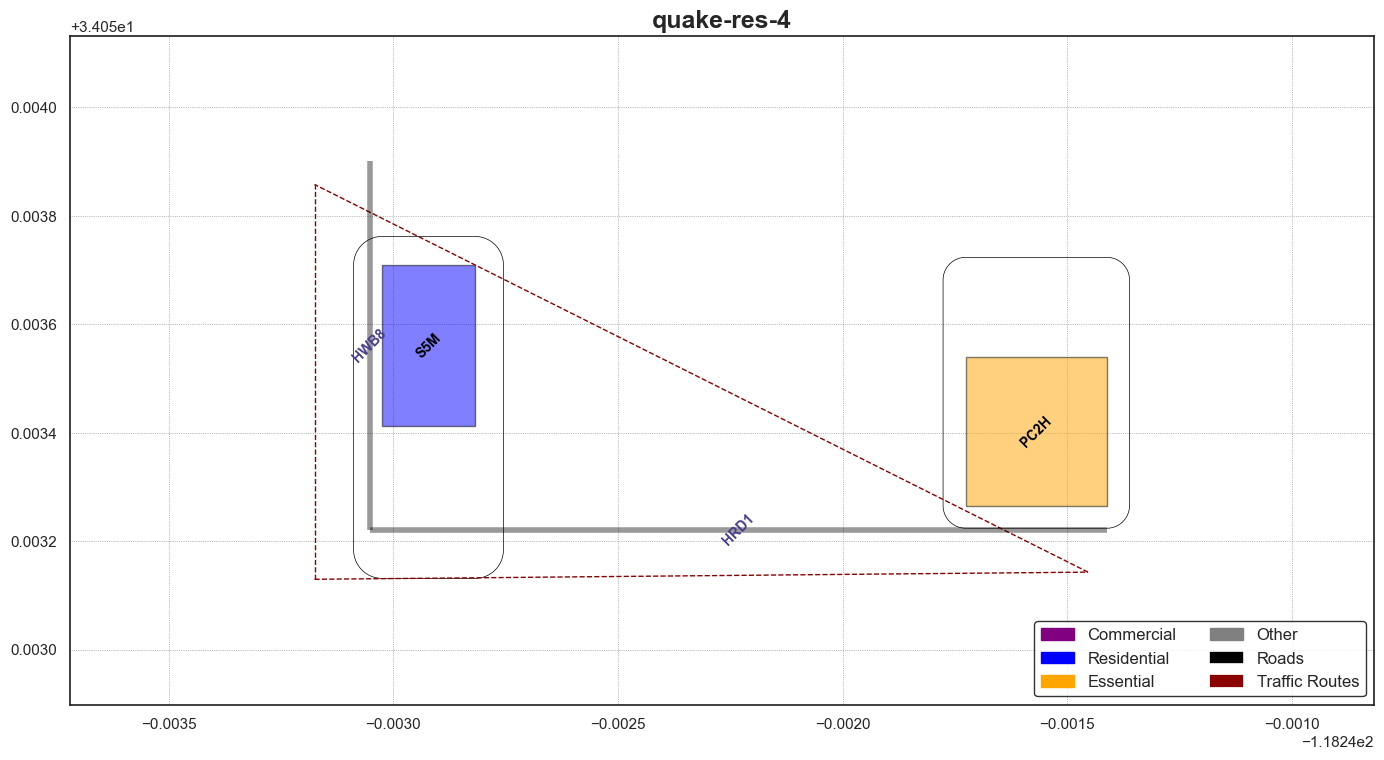

In [5]:
n_agents = 4
env_data = PathUtils.env_data[str(n_agents)]
in_buildings = gpd.read_file(env_data["buildings"])
in_roads = gpd.read_file(env_data["roads"])
in_traffic_gdf = gpd.read_file(env_data["traffic_links"])
in_traffic_dem = pd.read_csv(env_data["traffic_dem"])
in_traffic_net = pd.read_csv(env_data["traffic_net"])

sim = InterdependentNetworkSimulation(
    use_premade=True,
    buildings_study_gdf=in_buildings,
    roads_study_gdf=in_roads,
    traffic_net_df=in_traffic_net,
    traffic_dem_df=in_traffic_dem,
    traffic_links_gdf=in_traffic_gdf,
    verbose=True
)
sim.buildings_study.get_debris()
sim.viz_environment("quake-res-4", show_road_ids=True)



In [5]:
# sim.earthquake.DEL_incore_earthquake(bearer_token, "680540d08df0482ab72d816d")

In [6]:
earthquake_magnitudes = [7.0, 7.5, 8.0, 8.5, 9.0]
for M in earthquake_magnitudes:
    save_IMs_directory = r"C:\Users\Anton\OneDrive\Desktop\tudelft_thesis\qres_marl\quake_envs_pkg\quake_envs\simulations\earthquake"
    save_bldg_IMs_file = "toy_city_4_bldg_IM_" + str(M) + ".json"
    save_road_IMs_file = "toy_city_4_road_IMs_" + str(M) + ".json"
    src = sim.earthquake.generate_random_point_in_ring(
      sim.center,
      50,
      100
    )
    quake_model_dict = sim.earthquake.create_earthquake_model(
        name='toy_city_10_eq_model',
        description='Earthquake model for toy city with 10 components',
        src_point=src,
        magnitude=M,
        depth=5,
        demand_type='PGA',
        bounds=sim.bounds,
        attenuation_models={AttenuationModels.AB1995: '1.0'}
    )
    model_save_path = r"C:\Users\Anton\OneDrive\Desktop\tudelft_thesis\qres_marl\quake_envs_pkg\quake_envs\simulations\earthquake\incore_eq_model_10.json"
    sim.earthquake.save_earthquake_json(quake_model_dict, model_save_path)
    eq_model = sim.earthquake.read_earthquake_json(model_save_path)

    quake_id = sim.earthquake.POST_incore_earthquake(client, eq_model)
    sim.earthquake.POST_incore_eq_building_hazard_values(client, quake_id)
    sim.earthquake.POST_incore_eq_road_hazard_values(client, quake_id)

    sim.earthquake.save_building_IM(save_IMs_directory, save_bldg_IMs_file)
    sim.earthquake.save_road_IM(save_IMs_directory, save_road_IMs_file)

    sim.earthquake.DEL_incore_earthquake(bearer_token, quake_id)

Successfully created earthquake model dict: {'name': 'toy_city_10_eq_model', 'description': 'Earthquake model for toy city with 10 components', 'eqType': 'model', 'attenuations': {'AtkinsonBoore1995': '1.0'}, 'eqParameters': {'srcLatitude': '33.75757620396702', 'srcLongitude': '-117.84893987624856', 'magnitude': '7.0', 'depth': '5'}, 'visualizationParameters': {'demandType': 'PGA', 'demandUnits': 'g', 'minX': '-118.24302483704504', 'minY': '34.053265561193264', 'maxX': '-118.24141185843887', 'maxY': '34.05370943501951', 'numPoints': '1025', 'amplifyHazard': 'true'}}
{
    "name": "toy_city_10_eq_model",
    "description": "Earthquake model for toy city with 10 components",
    "eqType": "model",
    "attenuations": {
        "AtkinsonBoore1995": "1.0"
    },
    "eqParameters": {
        "srcLatitude": "33.75757620396702",
        "srcLongitude": "-117.84893987624856",
        "magnitude": "7.0",
        "depth": "5"
    },
    "visualizationParameters": {
        "demandType": "PGA",
